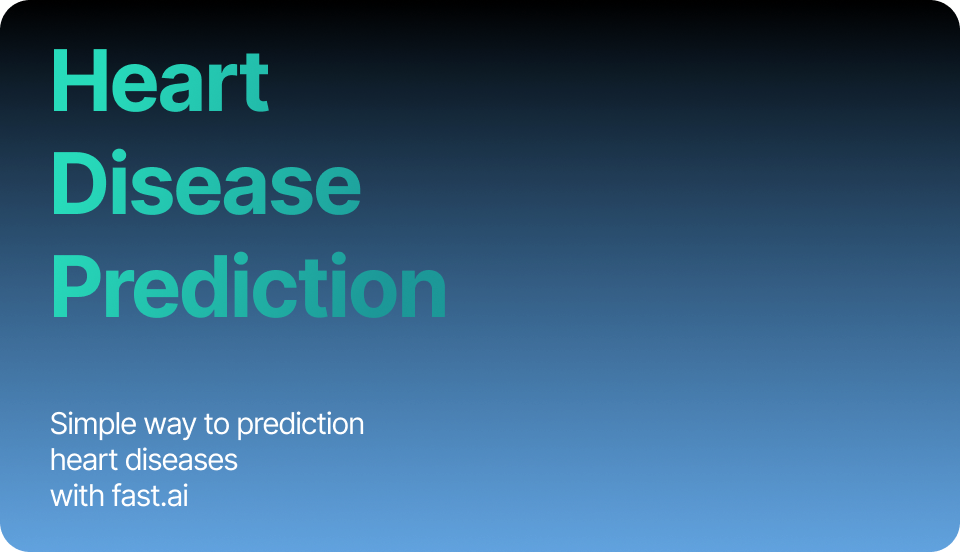
# 🟢 85% Accuracy - simple and fast way to prediction heart diseases with fast.ai 

<p style='font-size: 20px'>📝 This is just a basic solution how we can cooking tabular data with fast.ai framework in 5 steps to get <b style='font-size: 25px'>85%</b> accuracy of prediction heart diseases<p>
<p style='font-size: 18px';>In this notebook:
<li style="color: grey">Load and clean tabular data into Dataframe</li>
<li style="color: grey">Using histoplots for visualization data</li>
<li style="color: grey">Fast.ai for fast training tabular data</li>
<li style="color: grey">Metrics, including f1 score for binary classification</li>
<p>

### 1. Load framework fast.ai

In [226]:
from fastai.tabular.all import *

### 2. Load dataset and clear data

In [227]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


Describe.T the parameters

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


Let's see how much zero values we have in dataframe

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Ok, this is cat. values

Plot histograms and see: what we can do with data

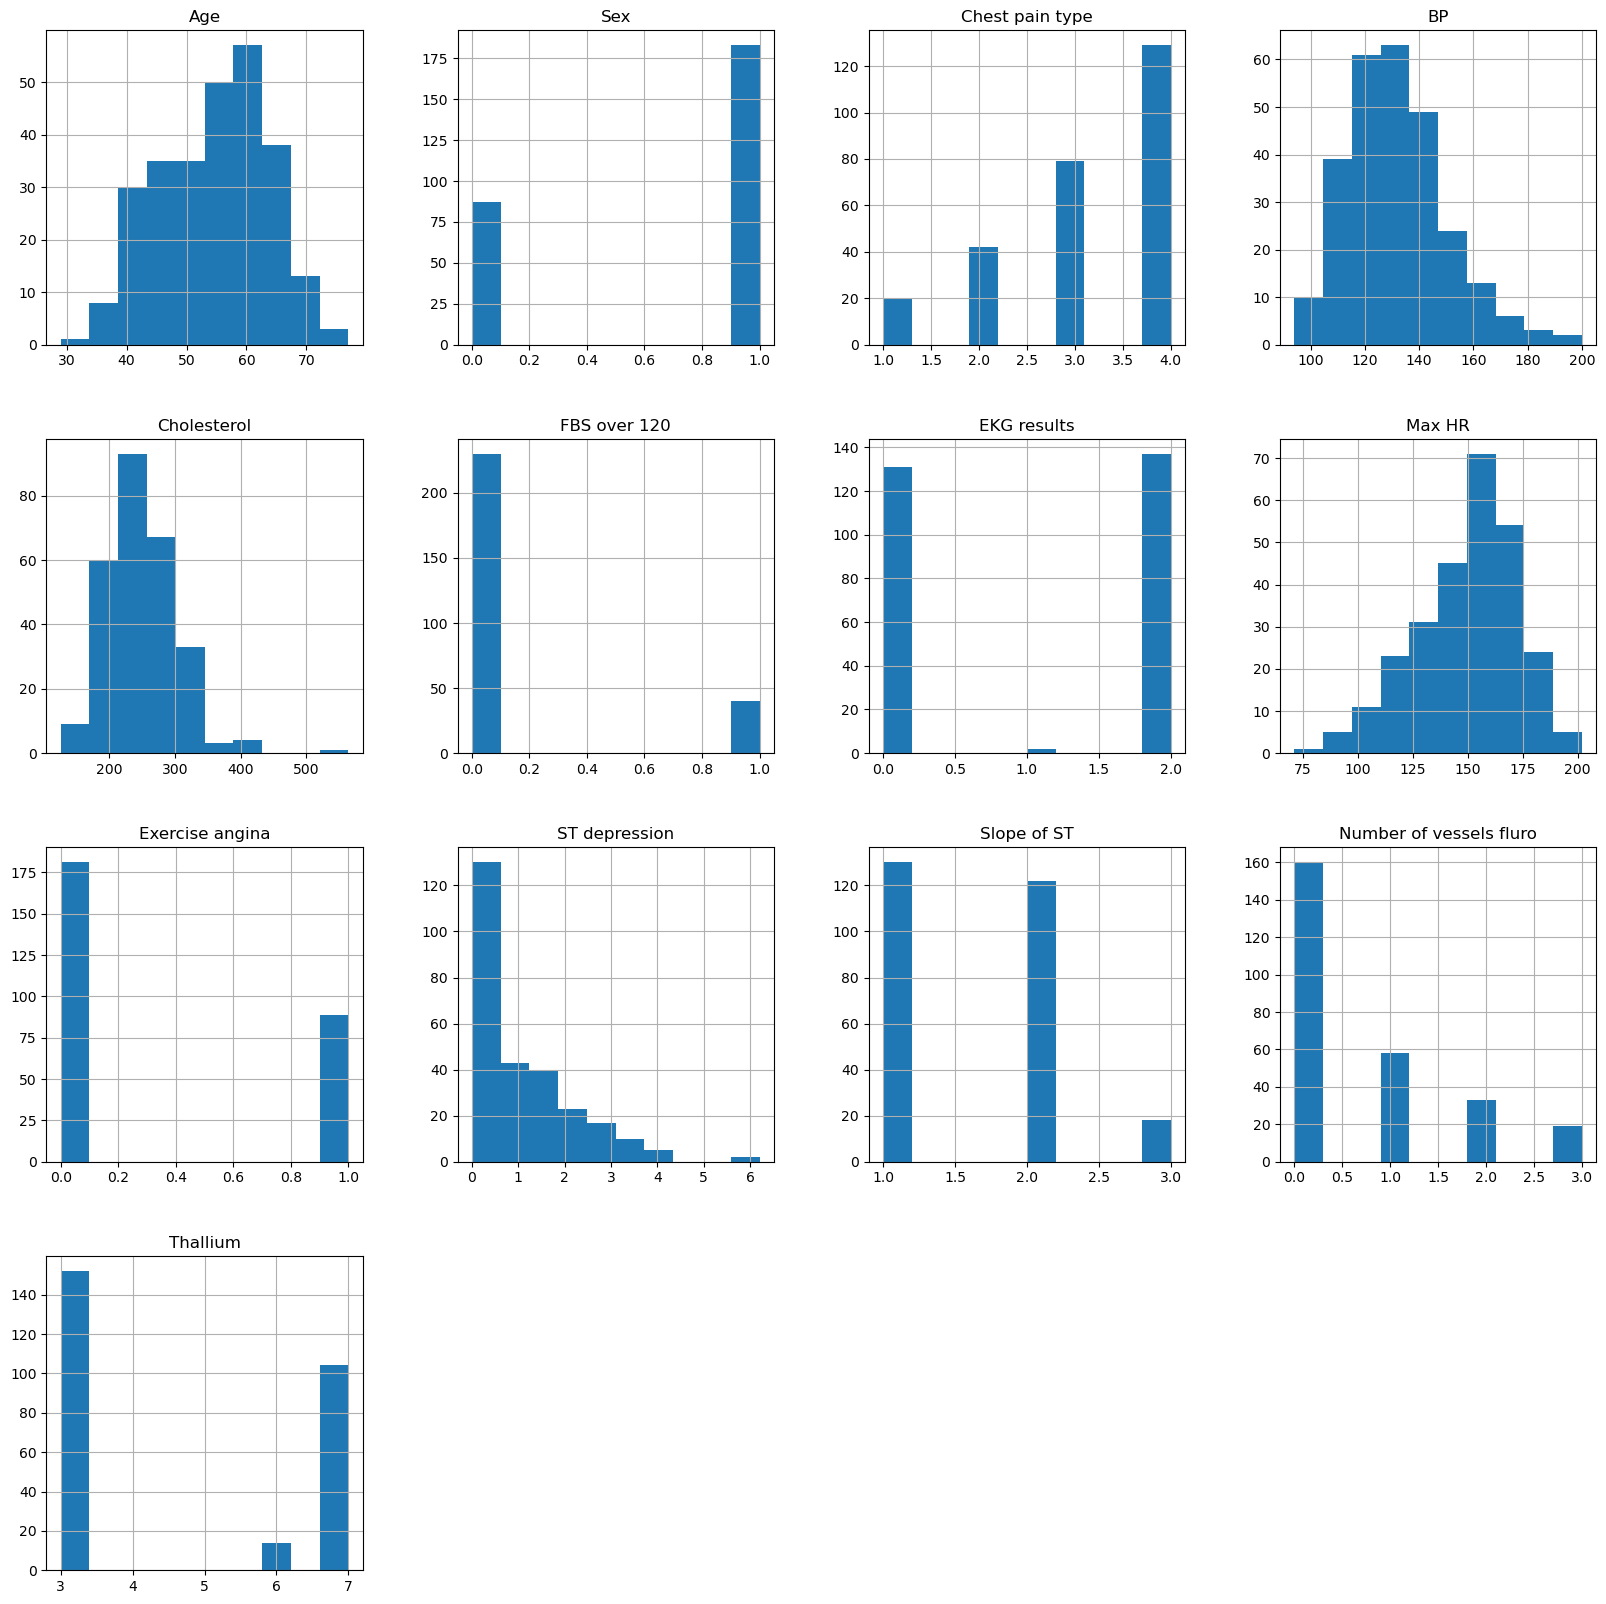

In [230]:
histogram_df = df.hist(figsize=(20, 20))

### 3. Load dls loader for set our data and settings

In [231]:
dls = TabularDataLoaders.from_df(df, y_names="Heart Disease",
                                 cat_names=['Sex',
                                            'Chest pain type',
                                            'FBS over 120',
                                            'EKG results',
                                            'Exercise angina',
                                            'Slope of ST',
                                            'Number of vessels fluro',
                                            'Thallium',
                                            'ST depression'],
                                 cont_names=['Cholesterol',
                                             'BP',
                                             'Age',
                                             'Max HR'],
                                 procs=[Categorify,
                                        FillMissing,
                                        Normalize],
                                 bs=32,
                                 device=torch.device('cpu'))

### 4. Load dls and metrics to learn function and set numbers of epochs - is 15, after this - run

In [232]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(15, lr_max=slice(3e-1, 1e-1))

C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.759731,0.597645,0.740741,00:00
1,0.713839,0.355560,0.870370,00:00
2,0.615130,0.270049,0.870370,00:00
3,0.566297,0.428403,0.888889,00:00
4,0.512897,0.422357,0.888889,00:00
5,0.476908,0.348390,0.907407,00:00
6,0.464175,0.278829,0.925926,00:00
7,0.421501,0.347059,0.870370,00:00
8,0.384255,0.449438,0.851852,00:00
9,0.344596,0.547486,0.814815,00:00


C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps

Let's see the confusion matrix of final results

C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


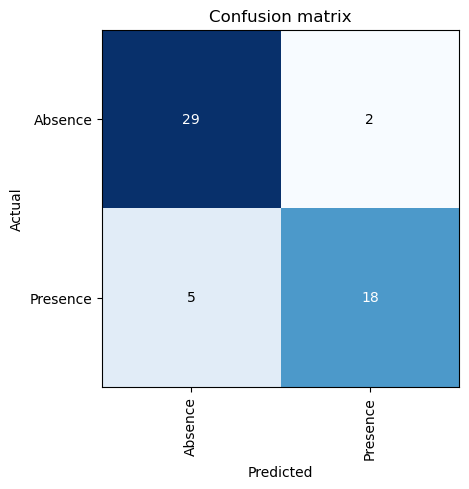

In [233]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Well, we see the great metrics

In [234]:
interp.print_classification_report()

C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


              precision    recall  f1-score   support

     Absence       0.85      0.94      0.89        31
    Presence       0.90      0.78      0.84        23

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



🟢 Conclusion
---
There are just 4 steps to get ~85% accuracy on this dataset without any special technics & tips. Your result would be better if you use it. Thanks for reading and take care 💚

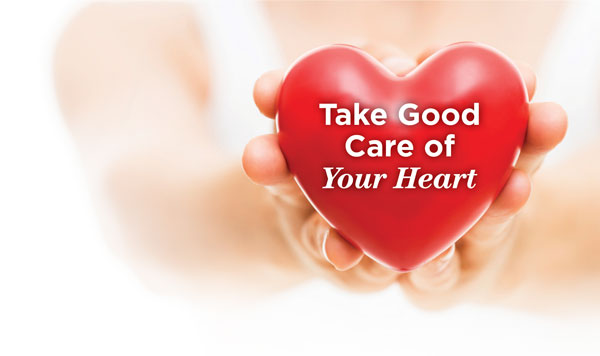